## Final Project Submission

Please fill out:
* Student name: Amanda Rowe
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL: https://roweyerboat.github.io/cleaning_geographical_data


For this project, we are analyzing King County Housing Data from the state of Washington.  My approach to this project follows the OSEMN framework: Obtain the data, Scrub the data, Explore the data, Model the data, and finally iNterpret the data.  I employed the different data cleaning techniques learned thus far in my coursework.  I worked to answer three different questions about the data through my data exploration.  Finally, I iterated through a variety of predictors to arrive at a model that accurately predicts house prices.


Step 1: Obtaining the data

In [1]:
# importing important libraries for data cleaning and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm


In [2]:
# importing the data into a dataframe
df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [3]:
# print out the size of the dataframe
print('rows and columns')
print(df.shape)
# print out a summary of the data
print('\n Summary data')
print(df.info())
# print out summary statistics of the data
print('\n Summary statistics')
print(df.describe())

rows and columns
(21597, 21)

 Summary data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), 

Step 2: Scrub Data

In [4]:
# checking datatypes
print('DataTypes')
print(df.dtypes)

DataTypes
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
# Why is sqft basement an object? Let's investigate
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [6]:
# As we saw in the printout of the first 10 rows, sqft_basement has '?' values
len(df.query("sqft_basement == '?'"))
# In fact there are 454 '?' in the data

454

In [7]:
# We should replace the ? with a placeholder meaning no basement
df.sqft_basement.replace(['?'], '0', inplace=True)

# now we can change it from a float to an integer datatype
df.sqft_basement = df.sqft_basement.astype('float')

# Let's check the datatype and the unique values of the column
print("Datatype: ", df.sqft_basement.dtype)
print("\n Unique Values:")
print(df.sqft_basement.unique())

Datatype:  float64

 Unique Values:
[   0.  400.  910. 1530.  730. 1700.  300.  970.  760.  720.  700.  820.
  780.  790.  330. 1620.  360.  588. 1510.  410.  990.  600.  560.  550.
 1000. 1600.  500. 1040.  880. 1010.  240.  265.  290.  800.  540.  710.
  840.  380.  770.  480.  570. 1490.  620. 1250. 1270.  120.  650.  180.
 1130.  450. 1640. 1460. 1020. 1030.  750.  640. 1070.  490. 1310.  630.
 2000.  390.  430.  850.  210. 1430. 1950.  440.  220. 1160.  860.  580.
 2060. 1820. 1180.  200. 1150. 1200.  680.  530. 1450. 1170. 1080.  960.
  280.  870. 1100.  460. 1400.  660. 1220.  900.  420. 1580. 1380.  475.
  690.  270.  350.  935. 1370.  980. 1470.  160.  950.   50.  740. 1780.
 1900.  340.  470.  370.  140. 1760.  130.  520.  890. 1110.  150. 1720.
  810.  190. 1290.  670. 1800. 1120. 1810.   60. 1050.  940.  310.  930.
 1390.  610. 1830. 1300.  510. 1330. 1590.  920. 1320. 1420. 1240. 1960.
 1560. 2020. 1190. 2110. 1280.  250. 2390. 1230.  170.  830. 1260. 1410.
 1340.  590. 15

In [8]:
# Encoding zip code as a string
df['zipcode'] = df['zipcode'].astype('str')

In [9]:
# Rechecking datatypes
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Checking for missing data

In [10]:
# Now let's check for the NA values
print(df.isna().sum())
# There are 3 columns with NA values: waterfront, view, and yr_renovated

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [11]:
# Summary statistics for the view column
df['view'].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [12]:
# Since most if not all entries are zero, replacing null
# values with the median is an acceptable move
df.view = df.view.fillna(value=df.view.median())

In [13]:
df.isna().sum()
# We can see that we've taken care of the view column's missing data

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [15]:
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [16]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [17]:
geometry = [Point(xy) for xy in zip(df.long, df.lat)]

In [18]:
geometry[:3]

In [19]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


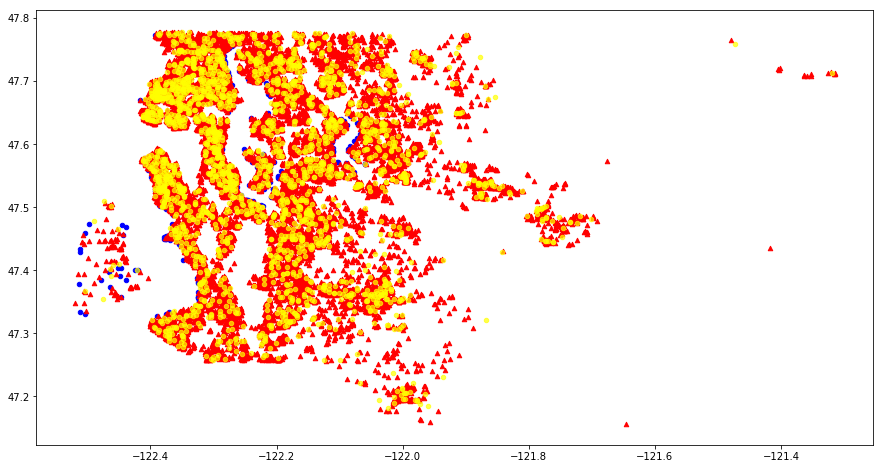

In [20]:
# Exploring where the waterfront properties lie and if there's a way
# to see if the null properties that lie close to waterfront could
# be recategorized as waterfront vs. non-waterfront
fig, ax = plt.subplots(figsize=(15,15))
geo_df[geo_df['waterfront'] == 1].plot(ax = ax, markersize = 20, color = 'blue', marker = 'o')
geo_df[geo_df['waterfront'] == 0].plot(ax = ax, markersize = 20, color = 'red', marker = '^')
geo_df[geo_df['waterfront'].isnull()].plot(ax =ax, markersize = 20, color = 'yellow', alpha = 0.7)


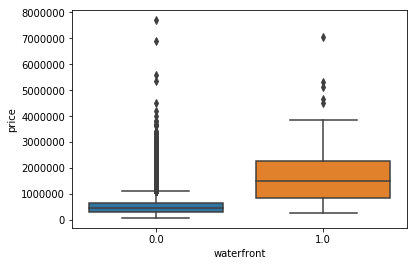

In [21]:
# Looking at the map above there are green dots well intermixed with
# the red and blue dots so it is difficult to determine which would
# be considered waterfront just based on that plot alone
# Another consideration is price
ax = sns.boxplot(x=df.waterfront, y=df.price, data=df)


In [22]:
print('Summary statistics for prices for all houses')
print('Mean:' , df.price.mean())
print('Median: ', df.price.median())
print('Standard deviation: ', df.price.std())

print('\nSummary statistics for prices listed with waterfront')
waterfront_prop = df[df.waterfront == 1]
print('Mean: ', waterfront_prop.price.mean())
print('Median: ', waterfront_prop.price.median())
print('Standard deviation: ', waterfront_prop.price.std())

print('\nSummary statistics for prices listed with no waterfront')
non_waterfront_prop = df[df.waterfront==0]
print('Mean: ', non_waterfront_prop.price.mean())
print('Median: ', non_waterfront_prop.price.median())
print('Standard deviation', non_waterfront_prop.price.std())


# There's definitely a difference between houses that have a waterfront 
# property or not but it seems like looking at the overall statistics 
# that includes the NaN values, then it is closely related to the
# houses listed with no waterfront.  



Summary statistics for prices for all houses
Mean: 540296.5735055795
Median:  450000.0
Standard deviation:  367368.1401013945

Summary statistics for prices listed with waterfront
Mean:  1717214.7260273972
Median:  1510000.0
Standard deviation:  1145384.8566607886

Summary statistics for prices listed with no waterfront
Mean:  532641.9866841416
Median:  450000.0
Standard deviation 344959.17804252123


In [23]:
# Because there doesn't seem to be a big difference between no waterfront
# houses and all the houses.  Therefore to deal with the NaN's entries
# I will fill the missing values with the mode and see how that changes
# the statistics
df.waterfront.fillna(0, inplace=True)
print('Mean: ', df.price.mean())
print('Median: ', df.price.median())
print('Standard deviation: ', df.price.std())

Mean:  540296.5735055795
Median:  450000.0
Standard deviation:  367368.1401013945


In [24]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
geometry            0
dtype: int64

In [25]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [26]:
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [27]:
# Seeing the summary statistics for the year renovated column
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [28]:
# Since more than 17000 of the 21000 houses hadn't been renovated
# it seems to make sense to change the values of the nan
# entries to be zero
df.yr_renovated = df.yr_renovated.fillna(value=df.yr_renovated.median())

In [29]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
geometry         0
dtype: int64

In [30]:
# Dropping the id column from our dataset as it's not needed
df = df.drop(['id'], axis=1) 

In [31]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


Step 3: Explore the Data

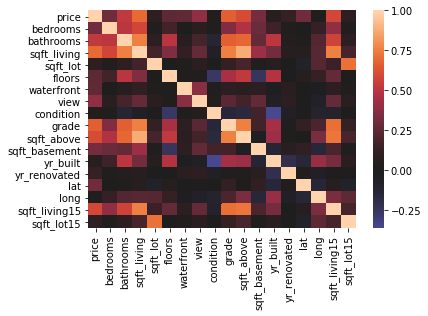

In [32]:
# Starting off looking at possible multicollinearity between our
# predictor values

# Setting a correlation matrix
corr=df.corr()

sns.heatmap(df.corr(), center=0);

sqft_living seems to be highly correlated with bathrooms, sqft_above and sqft_living15
it makes sense that these columns would have direct impact on total sqft_living of a house


In [33]:
# We can go through and analyze each of these, but it's helpful to 
# take the absolute value and see which ones are highly correlated
# so the absolute value would be between 0.75 and 1
abs(corr) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


In [34]:
# Since number of bathrooms, sqft_above, grade, and sqft_living15
# is highly correlated with it makes sense to drop bathrooms and grade
# as we have the condition column that gives us a similar data point as
# grade and the square footage seems more valuable than the number of 
# bathrooms.  Keeping the sqft_living15 as it relates to the size of 
# neighbors houses, but dropping sqft_above as it directly correlates 
# with the sqft_living
df.drop(['bathrooms'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)
df.drop(['sqft_above'], axis=1, inplace=True)
#check correlation with price - drop bedrooms and bathrooms makes more sense

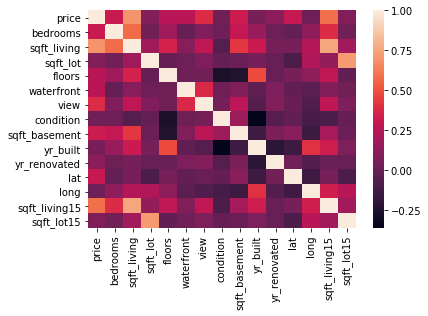

In [35]:
# checking our work with another heatmap
sns.heatmap(df.corr())

Now that we've cleaned up and filled in our missing values, let's look out for some outliers.

In [36]:
# Looking at some summary statistics
df.describe()

,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


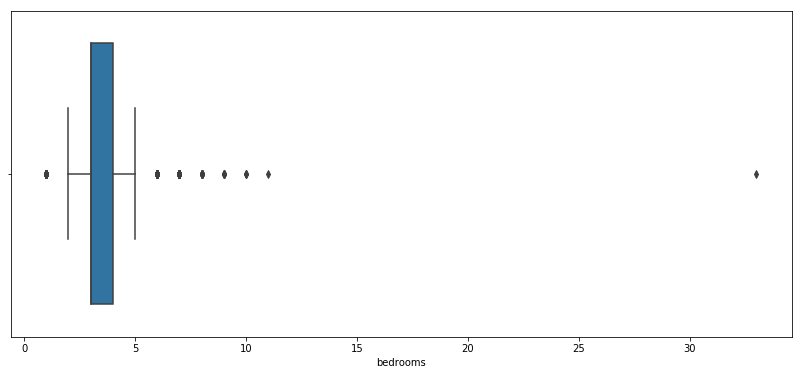

In [37]:
# Looking at the summary stats of bedrooms and also a boxplot
# we can see there is one entry that has 33 bedrooms
plt.figure(figsize=(14,6))
sns.boxplot(df.bedrooms)


In [38]:
# Let's look at the entries with more bedrooms just to check
# these entries - might be an error in entry
df[df.bedrooms>8]

,date,price,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
4092,5/7/2014,599999.0,9,3830,6988,2.5,0.0,0.0,3,1380.0,1938,0.0,98103,47.6927,-122.338,1460,6291,POINT (-122.33800 47.69270)
4231,1/6/2015,700000.0,9,3680,4400,2.0,0.0,0.0,3,850.0,1908,0.0,98102,47.6374,-122.324,1960,2450,POINT (-122.32400 47.63740)
6073,8/8/2014,1280000.0,9,3650,5000,2.0,0.0,0.0,3,1120.0,1915,2010.0,98105,47.6604,-122.289,2510,5000,POINT (-122.28900 47.66040)
8537,8/11/2014,450000.0,9,4050,6504,2.0,0.0,0.0,3,0.0,1996,0.0,98144,47.5923,-122.301,1448,3866,POINT (-122.30100 47.59230)
8748,8/21/2014,520000.0,11,3000,4960,2.0,0.0,0.0,3,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960,POINT (-122.36300 47.55600)
13301,8/14/2014,1150000.0,10,4590,10920,1.0,0.0,2.0,3,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400,POINT (-122.11300 47.58610)
15147,10/29/2014,650000.0,10,3610,11914,2.0,0.0,0.0,4,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914,POINT (-122.17500 47.57050)
15856,6/25/2014,640000.0,33,1620,6000,1.0,0.0,0.0,5,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,POINT (-122.33100 47.68780)
16830,3/17/2015,1400000.0,9,4620,5508,2.5,0.0,0.0,3,750.0,1915,0.0,98105,47.6684,-122.309,2710,4320,POINT (-122.30900 47.66840)
18428,3/13/2015,934000.0,9,2820,4480,2.0,0.0,0.0,3,940.0,1918,0.0,98105,47.6654,-122.307,2460,4400,POINT (-122.30700 47.66540)


It seems that the 33 bedrooms entry is a mistake as the living area is only 1620 square feet and only one floor.  The 11 bedroom house is more reasonable because of a larger square footage and 2 floors.


In [39]:
# It makes sense to drop the extreme outlier
df = df[df.bedrooms <= 11]

In [40]:
# Changing our date column to be a datetime format
df.date = pd.to_datetime(df.date)

In [41]:
df['month'] = df.date.dt.month

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 19 columns):
date             21596 non-null datetime64[ns]
price            21596 non-null float64
bedrooms         21596 non-null int64
sqft_living      21596 non-null int64
sqft_lot         21596 non-null int64
floors           21596 non-null float64
waterfront       21596 non-null float64
view             21596 non-null float64
condition        21596 non-null int64
sqft_basement    21596 non-null float64
yr_built         21596 non-null int64
yr_renovated     21596 non-null float64
zipcode          21596 non-null object
lat              21596 non-null float64
long             21596 non-null float64
sqft_living15    21596 non-null int64
sqft_lot15       21596 non-null int64
geometry         21596 non-null geometry
month            21596 non-null int64
dtypes: datetime64[ns](1), float64(8), geometry(1), int64(8), object(1)
memory usage: 3.3+ MB


Splitting our data into numerical and categorical

In [43]:
# Splitting up our categorical and numerical data into 2 dataframes
df_categorical = df[['month', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']].copy()
df_numerical = df[['price', 'bedrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].copy()

Categorical Variables
It's good to bin some of these categorical variables to make more sense of them

In [44]:
df_categorical.head()

,month,view,condition,waterfront,yr_built,yr_renovated,zipcode
0,10,0.0,3,0.0,1955,0.0,98178
1,12,0.0,3,0.0,1951,1991.0,98125
2,2,0.0,3,0.0,1933,0.0,98028
3,12,0.0,5,0.0,1965,0.0,98136
4,2,0.0,3,0.0,1987,0.0,98074


In [45]:
# Seeing what months are included
df_categorical.month.unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [46]:
# Changing 12 to 0 to make binning easier for seasons
df_categorical.month = df_categorical.month.replace(12, 0)

In [47]:
# Creating bins to be organized
bins = [0, 3, 6, 9, 11]
# binning the months column by season
bins_date = pd.cut(df_categorical['month'], bins, include_lowest=True, labels=['Winter', 'Spring', 'Summer', 'Fall'])
bins_date = bins_date.cat.as_unordered()

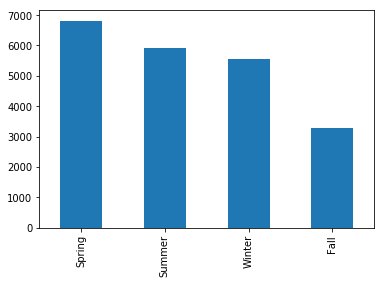

In [48]:
# Plotting the different seasons results of when houses sold
bins_date.value_counts().plot(kind='bar')

In [49]:
# Binning the view column as viewed and not viewed 
# instead of worrying about the number of views
bins = [0, 1, 4] 
bins_view = pd.cut(df_categorical['view'], bins, include_lowest=True, labels=['not_viewed', 'viewed'])
bins_view = bins_view.cat.as_unordered()

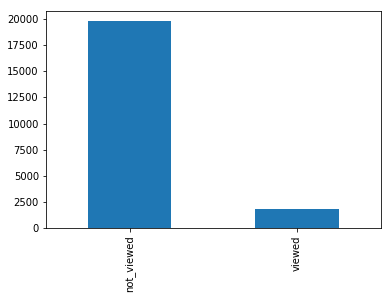

In [50]:
# Looking at the number of houses viewed and not viewed
bins_view.value_counts().plot(kind='bar')

In [51]:
df_categorical.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [52]:
# Looking at the summary statistics of year built
df_categorical.yr_built.describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [53]:
# Year Built is vastly varied so binning that data makes
# sense.  We can see from the summary data that
# we are looking at houses built from 1900-2015, so it makes sense
# to bin them for every 25 years
bins = [1900, 1925, 1950, 1975, 2000, 2015]
bins_yr_built = pd.cut(df_categorical['yr_built'], bins, include_lowest=True, labels = ('1900-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2015'))
bins_yr_built = bins_yr_built.cat.as_unordered()

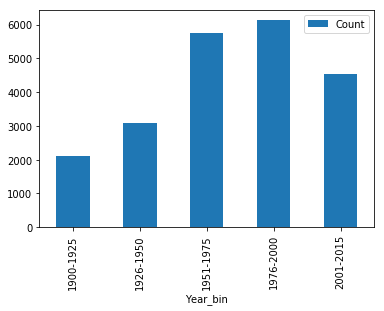

In [54]:
# Looking at the data after being binned
df_plot_me = pd.DataFrame({'Year_bin': bins_yr_built.values, 'Count':1})
df_plot_me.groupby('Year_bin').sum().plot(kind='bar')


In [55]:
df_categorical.yr_renovated.describe()

count    21596.000000
mean        68.761391
std        364.045627
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [56]:
# Looking at the summary stats it makes sense to bin as
# renovated or not renovated
bins = [0, 1, 2015]
bins_yr_renovated = pd.cut(df_categorical['yr_renovated'], bins, include_lowest=True, labels=['not_renovated', 'renovated'])
bins_yr_renovated = bins_yr_renovated.cat.as_unordered()

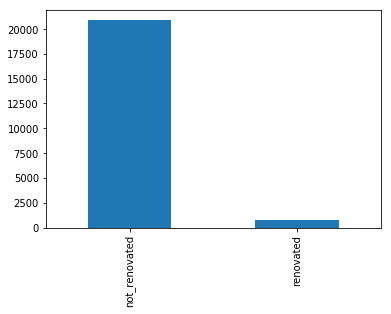

In [57]:
bins_yr_renovated.value_counts().plot(kind='bar')

In [58]:
# Since both condition and waterfront are whole numbers
# we can encode them as integers and then as strings
df_categorical['condition'] = df_categorical['condition'].astype('int')
df_categorical['waterfront'] = df_categorical['waterfront'].astype('int')

In [59]:
# Switching categorical columns to str to be one-hot encoded
df_categorical['condition'] = df_categorical['condition'].astype('str')
df_categorical['waterfront'] = df_categorical['waterfront'].astype('str')
df_categorical['zipcode'] = df_categorical['zipcode'].astype('str')

In [60]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 7 columns):
month           21596 non-null int64
view            21596 non-null float64
condition       21596 non-null object
waterfront      21596 non-null object
yr_built        21596 non-null int64
yr_renovated    21596 non-null float64
zipcode         21596 non-null object
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [61]:
# Dropping original columns to add binned columns
df_categorical = df_categorical.drop(['view', 'month', 'yr_built', 'yr_renovated'], axis=1)
df_categorical = pd.concat([df_categorical, bins_date, bins_view, bins_yr_built, bins_yr_renovated], axis=1)

In [62]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 7 columns):
condition       21596 non-null object
waterfront      21596 non-null object
zipcode         21596 non-null object
month           21596 non-null category
view            21596 non-null category
yr_built        21596 non-null category
yr_renovated    21596 non-null category
dtypes: category(4), object(3)
memory usage: 759.8+ KB


One-Hot Encode

In [63]:
df_categorical = pd.get_dummies(df_categorical)
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 90 columns):
condition_1                   21596 non-null uint8
condition_2                   21596 non-null uint8
condition_3                   21596 non-null uint8
condition_4                   21596 non-null uint8
condition_5                   21596 non-null uint8
waterfront_0                  21596 non-null uint8
waterfront_1                  21596 non-null uint8
zipcode_98001                 21596 non-null uint8
zipcode_98002                 21596 non-null uint8
zipcode_98003                 21596 non-null uint8
zipcode_98004                 21596 non-null uint8
zipcode_98005                 21596 non-null uint8
zipcode_98006                 21596 non-null uint8
zipcode_98007                 21596 non-null uint8
zipcode_98008                 21596 non-null uint8
zipcode_98010                 21596 non-null uint8
zipcode_98011                 21596 non-null uint8
zipcode_98014           

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2c228048>,
      dtype=object)

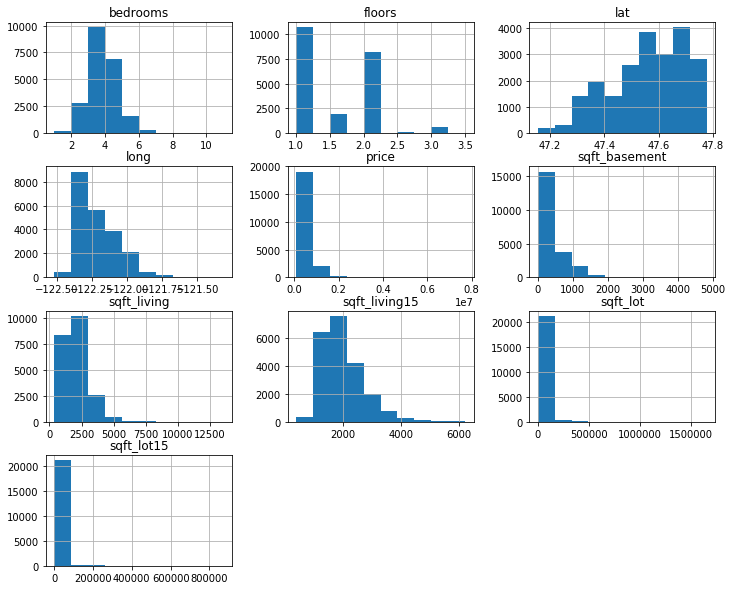

In [64]:
df_numerical.hist(figsize=(12,10))

In [65]:
df_numerical.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1180,1.0,5650,0.0,47.5112,-122.257,1340,5650
1,538000.0,3,2570,2.0,7242,400.0,47.7210,-122.319,1690,7639
2,180000.0,2,770,1.0,10000,0.0,47.7379,-122.233,2720,8062
3,604000.0,4,1960,1.0,5000,910.0,47.5208,-122.393,1360,5000
4,510000.0,3,1680,1.0,8080,0.0,47.6168,-122.045,1800,7503


Exploring different relationships in our data

Possible questions to answer:

Do houses with a higher percentage of their lot being used for living cost more or less than those that have more space?

What are the unique features of the top 25% expensive houses?  

For the houses built after 2000, what is their size contrasted with houses built before 2000?

Which season is are the most expensive houses sold?


In [66]:
# Creating a new column called percentage of lot and taking the sqft_above divided
# by the sqft_lot and multiplying by 100 to give the percentage of the house taking up
# Subtracting it from one gives the percentage of the 
# lot that is yard space
df_numerical['yard_percent'] = (1-(df_numerical['sqft_living']/df_numerical['sqft_lot']))*100
df_numerical.head()


,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,yard_percent
0,221900.0,3,1180,1.0,5650,0.0,47.5112,-122.257,1340,5650,79.115044
1,538000.0,3,2570,2.0,7242,400.0,47.7210,-122.319,1690,7639,64.512566
2,180000.0,2,770,1.0,10000,0.0,47.7379,-122.233,2720,8062,92.300000
3,604000.0,4,1960,1.0,5000,910.0,47.5208,-122.393,1360,5000,60.800000
4,510000.0,3,1680,1.0,8080,0.0,47.6168,-122.045,1800,7503,79.207921


Do houses with a higher percentage of their lot being used for living cost more or less than those that have more space?

In [67]:
# Checking the added feature of yard_percent if it has multicollinearity with other features
corr_num = df_numerical.corr()
abs(corr_num) > .75

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,yard_percent
price,True,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,True,False,False
floors,False,False,False,True,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,True,False,False,False,False,False
lat,False,False,False,False,False,False,True,False,False,False,False
long,False,False,False,False,False,False,False,True,False,False,False
sqft_living15,False,False,True,False,False,False,False,False,True,False,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True,False


In [68]:
df['price'].describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [69]:
df_final = pd.concat([df_numerical, df_categorical], axis=1)
df_final.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
0,221900.0,3,1180,1.0,5650,0.0,47.5112,-122.257,1340,5650,...,1,1,0,0,0,1,0,0,1,0
1,538000.0,3,2570,2.0,7242,400.0,47.7210,-122.319,1690,7639,...,0,1,0,0,0,1,0,0,0,1
2,180000.0,2,770,1.0,10000,0.0,47.7379,-122.233,2720,8062,...,0,1,0,0,1,0,0,0,1,0
3,604000.0,4,1960,1.0,5000,910.0,47.5208,-122.393,1360,5000,...,0,1,0,0,0,1,0,0,1,0
4,510000.0,3,1680,1.0,8080,0.0,47.6168,-122.045,1800,7503,...,0,1,0,0,0,0,1,0,1,0


In [70]:
df_final['yard_percent'].describe()
# Looking at the summary statistics, it seems that there's an error
# in the input of some data, either sqft_living or sqft_lot as there is
# a negative value for the percentage of yard space

count    21596.000000
mean        67.624206
std         26.846593
min       -365.384615
25%         59.238527
50%         75.233530
75%         84.335119
max         99.939045
Name: yard_percent, dtype: float64

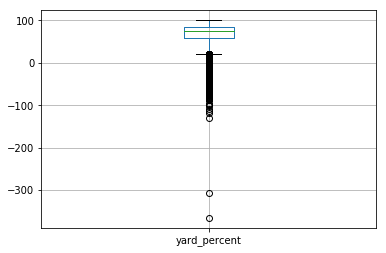

In [71]:
df_final.boxplot(column='yard_percent')

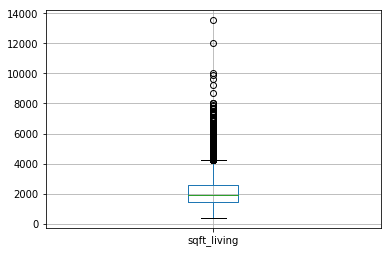

In [72]:
df_final.boxplot(['sqft_living'])

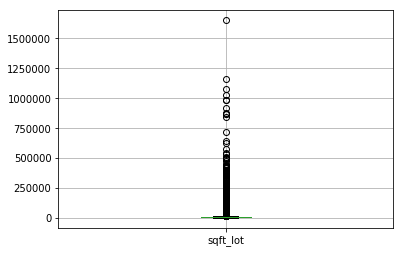

In [73]:
df_final.boxplot(['sqft_lot'])

In [74]:
df_final[['sqft_living','sqft_lot']].describe()

,sqft_living,sqft_lot
count,21596.000000,2.159600e+04
mean,2080.343165,1.509983e+04
std,918.122038,4.141355e+04
min,370.000000,5.200000e+02
25%,1430.000000,5.040000e+03
50%,1910.000000,7.619000e+03
75%,2550.000000,1.068550e+04
max,13540.000000,1.651359e+06


In [75]:
df_final[df_final['yard_percent'] < 0]
# so 788 entries have sqft_living spaces that are larger than sqft_lot
# this means that either they are entered incorrectly or those column
# values aren't referring to separate values but rather sqft_lot is the
# yard size?

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
63,549000.0,3,1540,3.0,1044,0.0,47.6765,-122.320,1580,3090,...,0,1,0,0,0,0,0,1,1,0
116,518500.0,3,1590,3.0,1102,0.0,47.6824,-122.347,1620,3166,...,0,1,0,0,0,0,0,1,1,0
175,425000.0,3,1120,2.0,1100,300.0,47.6106,-122.310,1590,1795,...,0,1,0,0,0,0,0,1,1,0
406,450000.0,3,1290,3.0,1213,0.0,47.6609,-122.344,1290,3235,...,0,1,0,0,0,0,0,1,1,0
547,259950.0,2,1070,2.0,649,350.0,47.5213,-122.357,1070,928,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21579,520000.0,2,1530,3.0,981,50.0,47.6533,-122.346,1530,1282,...,1,1,0,0,0,0,0,1,1,0
21585,467000.0,3,1425,3.0,1179,0.0,47.6963,-122.318,1285,1253,...,0,1,0,0,0,0,0,1,1,0
21588,429000.0,3,1490,3.0,1126,0.0,47.5699,-122.288,1400,1230,...,0,1,0,0,0,0,0,1,1,0
21591,475000.0,3,1310,2.0,1294,130.0,47.5773,-122.409,1330,1265,...,0,1,0,0,0,0,0,1,1,0


I'll drop the 788 negative yard percentages just for exploring the answer to this question.

In [76]:
df_yard = df_final[df_final['yard_percent']>0]
df_yard.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
0,221900.0,3,1180,1.0,5650,0.0,47.5112,-122.257,1340,5650,...,1,1,0,0,0,1,0,0,1,0
1,538000.0,3,2570,2.0,7242,400.0,47.7210,-122.319,1690,7639,...,0,1,0,0,0,1,0,0,0,1
2,180000.0,2,770,1.0,10000,0.0,47.7379,-122.233,2720,8062,...,0,1,0,0,1,0,0,0,1,0
3,604000.0,4,1960,1.0,5000,910.0,47.5208,-122.393,1360,5000,...,0,1,0,0,0,1,0,0,1,0
4,510000.0,3,1680,1.0,8080,0.0,47.6168,-122.045,1800,7503,...,0,1,0,0,0,0,1,0,1,0


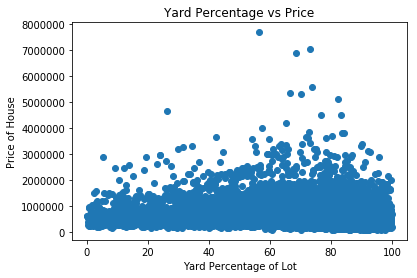

In [77]:
plt.scatter(x=df_yard['yard_percent'], y=df_yard['price'])
plt.xlabel('Yard Percentage of Lot')
plt.ylabel('Price of House')
plt.title('Yard Percentage vs Price')
plt.show()

We can see that the percentage of yard doesn't seem to have a close influence on price.  While you can see that some of the larger yards, 60% and above, have a higher price.  There are houses with similar prices to those with little to no yard space.

What are the unique features of the top 25% expensive houses? 

In [78]:
# Creating a dataframe for the top 25% prices of houses sold
df_top25 = df_final[df_final.price > 645000]
df_top25.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
5,1230000.0,4,5420,1.0,101930,1530.0,47.6561,-122.005,4760,101930,...,0,1,0,0,0,0,0,1,1,0
10,662500.0,3,3560,1.0,9796,1700.0,47.6007,-122.145,2210,8925,...,0,1,0,0,0,1,0,0,1,0
15,650000.0,4,2950,2.0,5000,970.0,47.5714,-122.375,2140,4000,...,0,0,1,0,0,0,1,0,1,0
21,2000000.0,3,3050,1.0,44867,720.0,47.5316,-122.233,4110,20336,...,0,0,1,0,0,1,0,0,1,0
26,937000.0,3,2450,2.0,2691,700.0,47.6386,-122.360,1760,3573,...,0,1,0,1,0,0,0,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2ba7a390>,
      dtype=object)

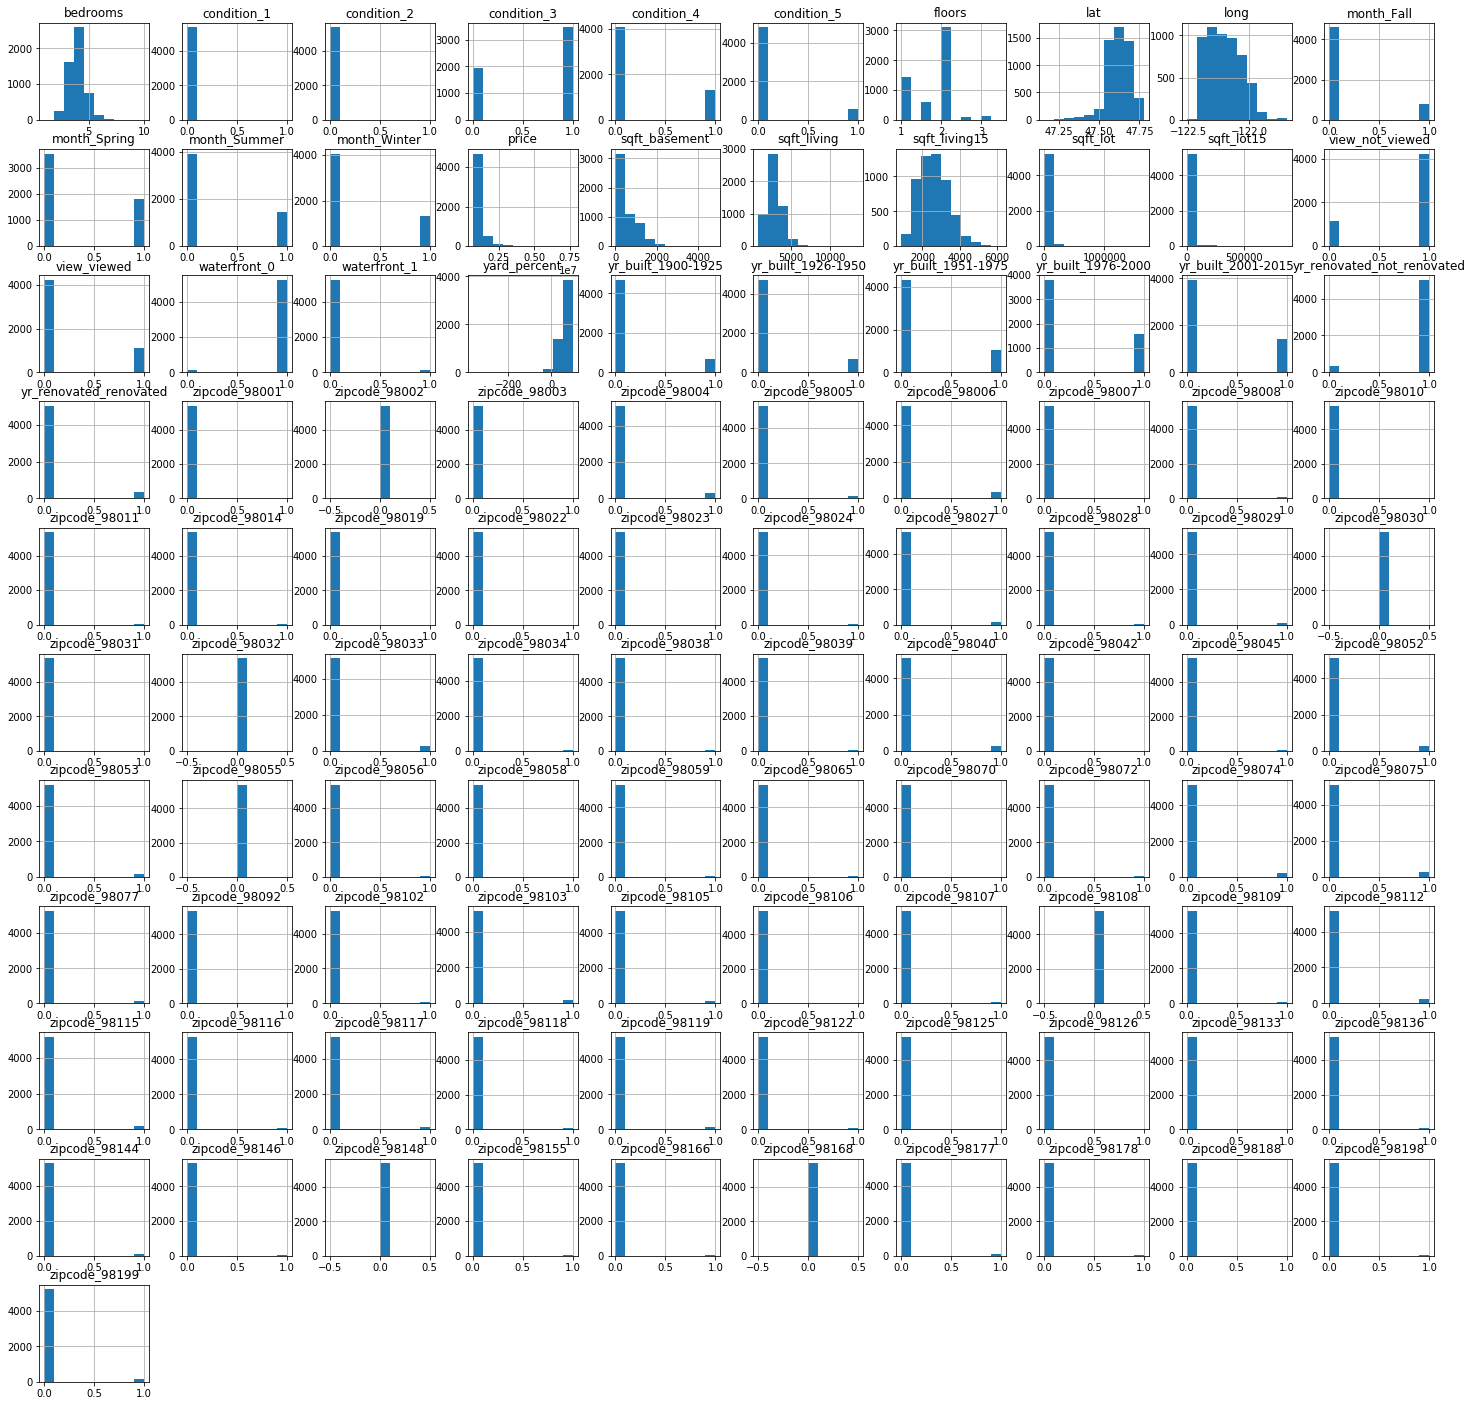

In [79]:
df_top25.hist(figsize=(25,25))

Zipcodes with the top 25: 98001, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98019, 98023, 98027, 98052, 98055, 98056, 98070, 98075, 98077, 98092, 98118, 98119, 98126, 98133, 98136, 98144, 98146, 98148, 98166, 98168

In [80]:
df_top25.describe()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
count,5.371000e+03,5371.000000,5371.000000,5371.000000,5.371000e+03,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,...,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,9.878394e+05,3.823869,2999.178551,1.712903,2.136319e+04,455.326755,47.619641,-122.202705,2618.602309,16300.245950,...,0.145969,0.789797,0.210203,0.126420,0.121393,0.192888,0.293055,0.266245,0.934463,0.065537
std,4.771142e+05,0.893738,1027.105896,0.496411,6.049521e+04,570.176652,0.075098,0.135588,782.286098,35311.283208,...,0.353108,0.407491,0.407491,0.332353,0.326613,0.394602,0.455206,0.442035,0.247494,0.247494
min,6.455000e+05,1.000000,890.000000,1.000000,5.200000e+02,0.000000,47.159300,-122.514000,860.000000,967.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.235000e+05,3.000000,2330.000000,1.000000,5.400000e+03,0.000000,47.570800,-122.313000,2020.000000,5250.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,8.260000e+05,4.000000,2880.000000,2.000000,8.580000e+03,0.000000,47.629800,-122.209000,2570.000000,8416.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.050000e+06,4.000000,3510.000000,2.000000,1.434750e+04,880.000000,47.673200,-122.106000,3130.000000,12911.500000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,7.700000e+06,10.000000,13540.000000,3.500000,1.651359e+06,4820.000000,47.776400,-121.691000,6210.000000,871200.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
df_top25.dtypes

price                         float64
bedrooms                        int64
sqft_living                     int64
floors                        float64
sqft_lot                        int64
                               ...   
yr_built_1951-1975              uint8
yr_built_1976-2000              uint8
yr_built_2001-2015              uint8
yr_renovated_not_renovated      uint8
yr_renovated_renovated          uint8
Length: 101, dtype: object

Text(0.5,1,'Top 25% Most Expensive Houses Bedroom Count')

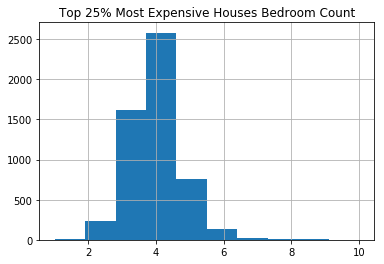

In [82]:
df_top25.hist(column='bedrooms')
plt.title('Top 25% Most Expensive Houses Bedroom Count')

Text(0.5,1,'Top 25% Most Expensive Houses Square Feet of Living Space')

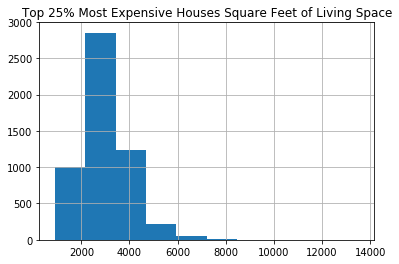

In [83]:
df_top25.hist(column=['sqft_living'])
plt.title('Top 25% Most Expensive Houses Square Feet of Living Space')

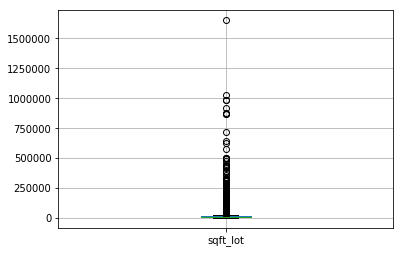

In [84]:
df_top25.boxplot(column='sqft_lot')

What are the unique features of the top 25% expensive houses?  
Looking at the top 25% most expensive houses, having 3+ bedrooms, over 2000 square feet of living space stick out as unique features.  A big feature is having 5000 square feet for the lot.  There is an equal spread of when the houses were built.  Also the neighboring houses usually have around at least 2000 square feet of living space. 

For the houses built after 2000, what is their size contrasted with houses built before 2000?

In [85]:
df_final['yr_built_2001-2015'].unique()

array([0, 1], dtype=uint64)

In [86]:
df_after_2000 = df_final[df_final['yr_built_2001-2015'] == 1]
df_after_2000.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
5,1230000.0,4,5420,1.0,101930,1530.0,47.6561,-122.005,4760,101930,...,0,1,0,0,0,0,0,1,1,0
9,323000.0,3,1890,2.0,6560,0.0,47.3684,-122.031,2390,7570,...,0,1,0,0,0,0,0,1,1,0
29,719000.0,4,2570,2.0,7173,0.0,47.7073,-122.110,2630,6026,...,0,1,0,0,0,0,0,1,1,0
30,580500.0,3,2320,2.0,3980,0.0,47.5391,-122.070,2580,3980,...,1,1,0,0,0,0,0,1,1,0
31,280000.0,2,1190,3.0,1265,0.0,47.7274,-122.357,1390,1756,...,0,1,0,0,0,0,0,1,1,0


In [87]:
df_before_2000 = df_final[df_final['yr_built_2001-2015']==0]
df_before_2000.head()

,price,bedrooms,sqft_living,floors,sqft_lot,sqft_basement,lat,long,sqft_living15,sqft_lot15,...,month_Fall,view_not_viewed,view_viewed,yr_built_1900-1925,yr_built_1926-1950,yr_built_1951-1975,yr_built_1976-2000,yr_built_2001-2015,yr_renovated_not_renovated,yr_renovated_renovated
0,221900.0,3,1180,1.0,5650,0.0,47.5112,-122.257,1340,5650,...,1,1,0,0,0,1,0,0,1,0
1,538000.0,3,2570,2.0,7242,400.0,47.7210,-122.319,1690,7639,...,0,1,0,0,0,1,0,0,0,1
2,180000.0,2,770,1.0,10000,0.0,47.7379,-122.233,2720,8062,...,0,1,0,0,1,0,0,0,1,0
3,604000.0,4,1960,1.0,5000,910.0,47.5208,-122.393,1360,5000,...,0,1,0,0,0,1,0,0,1,0
4,510000.0,3,1680,1.0,8080,0.0,47.6168,-122.045,1800,7503,...,0,1,0,0,0,0,1,0,1,0


Text(0.5,1,'Square Feet of Houses Built Before 2000')

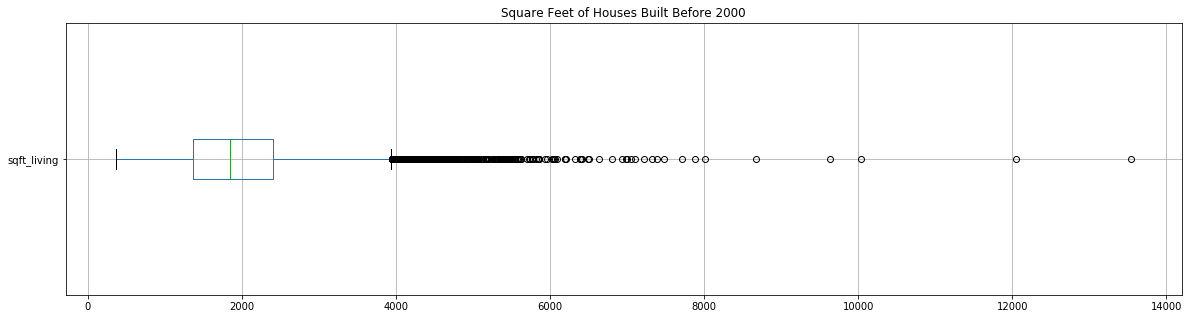

In [88]:
df_before_2000.boxplot('sqft_living', vert=False, figsize=(20,5))
plt.title('Square Feet of Houses Built Before 2000')

Text(0.5,1,'Square Feet of Houses Built After 2000')

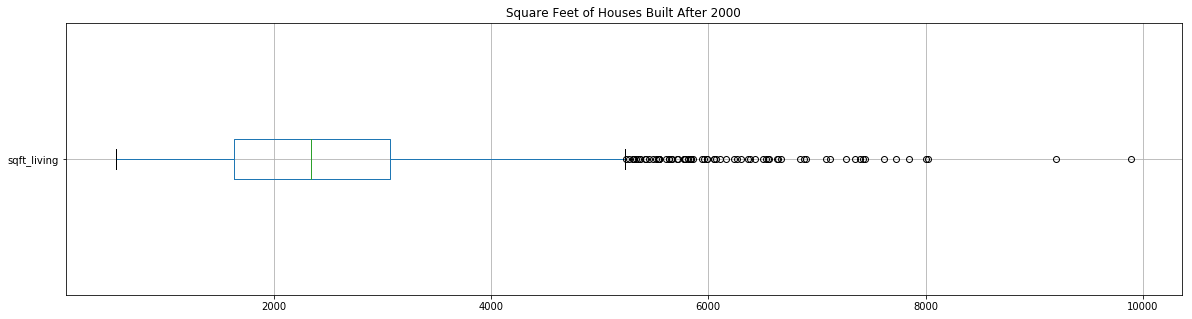

In [89]:
df_after_2000.boxplot('sqft_living', vert=False, figsize=(20,5))
plt.title('Square Feet of Houses Built After 2000')

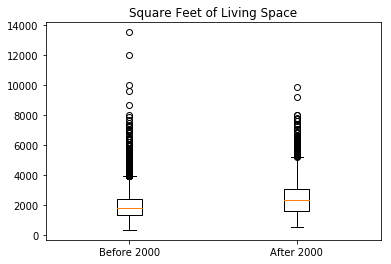

In [90]:
x1 = df_before_2000['sqft_living']
x2 = df_after_2000['sqft_living']
plt.boxplot([x1, x2], labels=['Before 2000', 'After 2000'])
plt.title('Square Feet of Living Space')
plt.show()

In [91]:
print('Summary Stats of the Sizes of Houses Built Before 2000')
print(df_before_2000['sqft_living'].describe())
print('\nSummary Stats of the Sizes of Houses Built After 2000')
print(df_after_2000['sqft_living'].describe())

Summary Stats of the Sizes of Houses Built Before 2000
count    17058.000000
mean      1978.367687
std        854.155070
min        370.000000
25%       1370.000000
50%       1840.000000
75%       2400.000000
max      13540.000000
Name: sqft_living, dtype: float64

Summary Stats of the Sizes of Houses Built After 2000
count    4538.000000
mean     2463.661305
std      1040.806753
min       550.000000
25%      1630.000000
50%      2340.000000
75%      3070.000000
max      9890.000000
Name: sqft_living, dtype: float64


In [92]:
df_before_2000['floors'].value_counts()

1.0    10396
2.0     4576
1.5     1880
3.0      103
2.5      101
3.5        2
Name: floors, dtype: int64

In [93]:
df_after_2000['floors'].value_counts()

2.0    3659
3.0     508
1.0     276
2.5      60
1.5      30
3.5       5
Name: floors, dtype: int64

Analyzing the square footage of houses built before 2000 versus those built after 2000, it is clear that more larger houses are being built now as you look at how the top 50% of houses built after 2000 is larger than the bottom 75% of houses built prior to 2000.  So while some larger houses were built before 2000, a majority of those with larger square footage have gone up in the last 20 years.
Along with that, comparatively speaking 93% of houses built after 2000 were built with 2+ floors. Whereas only 39% of houses built before 2000 had 2+ floors.  Therefore, it seems fairly safe to say a majority of the larger houses were built after the year 2000. 

Which season is are the most expensive houses sold?

In [94]:
df_Fall = df_final[df_final['month_Fall']==1]
df_Winter = df_final[df_final['month_Winter']==1]
df_Spring = df_final[df_final['month_Spring']==1]
df_Summer = df_final[df_final['month_Summer']==1]


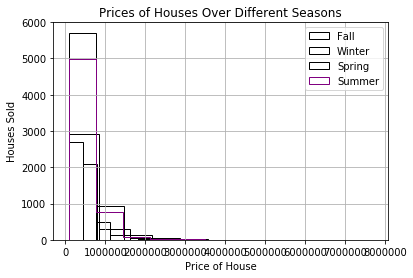

In [95]:
df_Fall['price'].plot(kind='hist', label='Fall', color='red', fill=False)
df_Winter['price'].plot(kind='hist', label ='Winter', color='blue', fill=False)
df_Spring['price'].plot(kind='hist', label='Spring', color='green', fill=False)
df_Summer['price'].hist(histtype='step', label='Summer', color='purple', fill=False)
plt.title('Prices of Houses Over Different Seasons')
plt.xlabel('Price of House')
plt.ylabel('Houses Sold')
plt.legend()

Looking at the chart, it seems that the best season to sell is Spring as that is when more houses are sold at higher prices and the best season to buy is Fall, less houses are sold and the prices are cheaper

Step 4: Model the Data

Because there is such a disparity between the most expensive houses and the rest of the houses on the market, it makes sense to make a model for the average house buyer/seller instead of the top 1% of house buyers.  

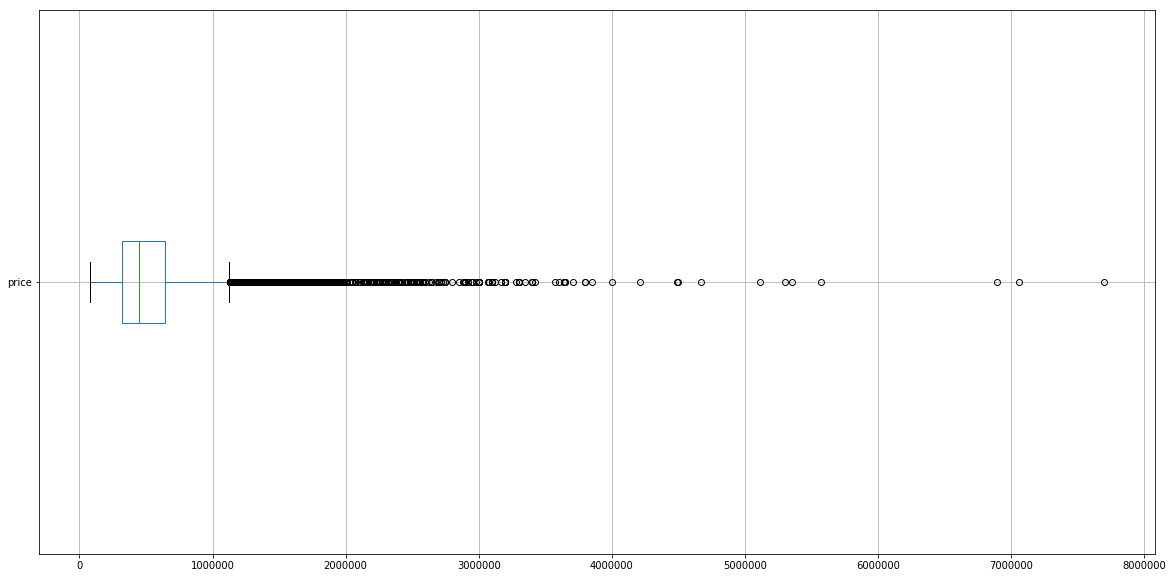

In [96]:
df_final.boxplot('price', vert=False, figsize=(20,10))

In [97]:
df_final['price'].describe()

count    2.159600e+04
mean     5.402920e+05
std      3.673760e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [98]:
df_final = df_final[df_final['price']<=625000]
df_final['price'].describe()

count     15869.000000
mean     386669.398702
std      122617.333454
min       78000.000000
25%      289000.000000
50%      380000.000000
75%      483500.000000
max      625000.000000
Name: price, dtype: float64

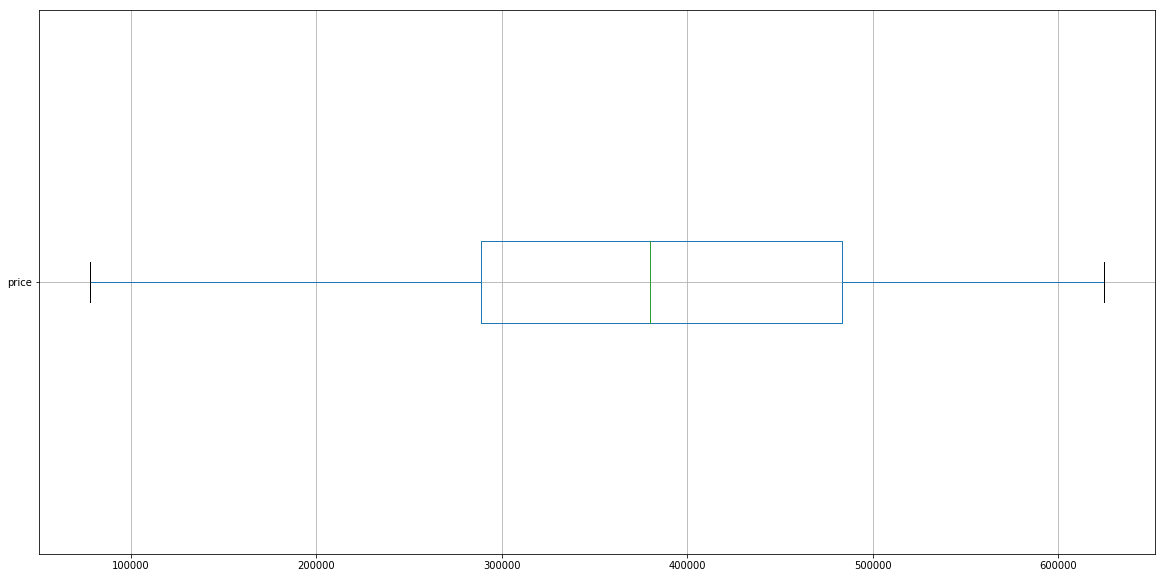

In [99]:
df_final.boxplot('price', vert=False, figsize=(20,10))

In [100]:
df_final.columns.values

array(['price', 'bedrooms', 'sqft_living', 'floors', 'sqft_lot',
       'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yard_percent', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'waterfront_0', 'waterfront_1',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_980

For this first model, I'm going to look at the features of square foot living, year built, month sold to predict the price.

In [101]:
# First round of creating a model is to look at
# the year the house was built
predictors_1 = df_final[['yr_built_1900-1925', 'yr_built_1926-1950', 'yr_built_1951-1975', 'yr_built_1976-2000', 'yr_built_2001-2015']]

In [102]:
X = predictors_1
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [103]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     141.0
Date:                Mon, 16 Mar 2020   Prob (F-statistic):          1.36e-118
Time:                        13:46:39   Log-Likelihood:            -2.0817e+05
No. Observations:               15869   AIC:                         4.164e+05
Df Residuals:                   15864   BIC:                         4.164e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
yr_built_1900-1925  4.132e+05   3241.673    127.461      0.000    4.07e+05     4.2e+05
yr_built_1926-1950    3.7e+05   2472.814    149.622      0.000    3.65e+05    3.75e+05
yr_built_1951-1975  3.604e+05   1768.196    203.800      0.000    3.57e+05    3.64e+05
yr_built_1976-2000  3.928e+05   1806.319    217.473      0.000    3.89e+05    3.96e+05
yr_built_2001-2015  4.191e+05   2194.358    190.986      0.000    4.15e+05    4.23e+05
==============================================================================
Omnibus:                     1921.410   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              544.782
Skew:                           0.130   Prob(JB):                    5.03e-119
Kurtosis:                       2.130   Cond. No.                         1.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
# 2nd model - size of the house
predictors_2 = df_final[['bedrooms', 'sqft_living', 'floors', 'sqft_lot', 'sqft_basement']]

In [105]:
X = predictors_2
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [107]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          3.270e+04
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                        0.00
Time:                        13:46:49   Log-Likelihood:                     -2.0819e+05
No. Observations:               15869   AIC:                                  4.164e+05
Df Residuals:                   15864   BIC:                                  4.164e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       3.151e+04   1142.364     27.581      0.000    2.93e+04    3.37e+04
sqft_living      73.1752      2.277     32.141      0.000      68.713      77.638
floors         9.047e+04   1904.374     47.509      0.000    8.67e+04    9.42e+04
sqft_lot          0.2768      0.030      9.242      0.000       0.218       0.335
sqft_basement    56.8000      3.241     17.527      0.000      50.448      63.152
==============================================================================
Omnibus:                      353.427   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.855
Skew:                           0.246   Prob(JB):                     1.70e-61
Kurtosis:                       2.573   Cond. No.                     7.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
# For the third model looking at the season it is sold
predictors_3 = df_final[['month_Winter', 'month_Spring', 'month_Summer', 'month_Fall']]

In [109]:
X = predictors_3
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [110]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.61
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           3.15e-08
Time:                        13:46:55   Log-Likelihood:            -2.0843e+05
No. Observations:               15869   AIC:                         4.169e+05
Df Residuals:                   15865   BIC:                         4.169e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
month_Winter  3.799e+05   1897.878    200.183      0.000    3.76e+05    3.84e+05
month_Spring  3.942e+05   1751.009    225.135      0.000    3.91e+05    3.98e+05
month_Summer  3.881e+05   1855.590    209.136      0.000    3.84e+05    3.92e+05
month_Fall    3.806e+05   2472.513    153.927      0.000    3.76e+05    3.85e+05
==============================================================================
Omnibus:                     2224.712   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.695
Skew:                           0.082   Prob(JB):                    1.30e-121
Kurtosis:                       2.097   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
# For the next model to look at the neighboring houses and the zip codes
predictors_4 = df_final[['sqft_living15', 'sqft_lot15', 'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199' ]]

In [112]:
X = predictors_4
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [114]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     388.3
Date:                Mon, 16 Mar 2020   Prob (F-statistic):               0.00
Time:                        13:47:08   Log-Likelihood:            -2.0051e+05
No. Observations:               15869   AIC:                         4.012e+05
Df Residuals:                   15798   BIC:                         4.017e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living15   120.4114      1.383     87.038      0.000     117.700     123.123
sqft_lot15        0.3165      0.028     11.346      0.000       0.262       0.371
zipcode_98001  5.463e+04   4666.574     11.708      0.000    4.55e+04    6.38e+04
zipcode_98002  5.379e+04   5659.017      9.505      0.000    4.27e+04    6.49e+04
zipcode_98003  5.873e+04   5168.285     11.364      0.000    4.86e+04    6.89e+04
zipcode_98004  3.159e+05    2.5e+04     12.634      0.000    2.67e+05    3.65e+05
zipcode_98005  2.935e+05    1.2e+04     24.481      0.000     2.7e+05    3.17e+05
zipcode_98006  2.561e+05   6431.721     39.824      0.000    2.44e+05    2.69e+05
zipcode_98007  2.715e+05   8319.221     32.632      0.000    2.55e+05    2.88e+05
zipcode_98008  2.736e+05   5859.649     46.694      0.000    2.62e+05    2.85e+05
zipcode_98010  1.207e+05   8756.550     13.782      0.000    1.04e+05    1.38e+05
zipcode_98011  1.972e+05   6400.933     30.810      0.000    1.85e+05     2.1e+05
zipcode_98014  1.374e+05   7811.072     17.587      0.000    1.22e+05    1.53e+05
zipcode_98019  1.469e+05   6255.041     23.486      0.000    1.35e+05    1.59e+05
zipcode_98022  7.521e+04   5604.421     13.421      0.000    6.42e+04    8.62e+04
zipcode_98023   4.21e+04   4296.901      9.797      0.000    3.37e+04    5.05e+04
zipcode_98024   1.66e+05   1.03e+04     16.076      0.000    1.46e+05    1.86e+05
zipcode_98027  2.169e+05   5392.034     40.229      0.000    2.06e+05    2.27e+05
zipcode_98028  1.831e+05   5418.552     33.783      0.000    1.72e+05    1.94e+05
zipcode_98029    2.7e+05   5914.334     45.652      0.000    2.58e+05    2.82e+05
zipcode_98030  6.235e+04   5351.896     11.651      0.000    5.19e+04    7.28e+04
zipcode_98031  6.347e+04   5235.196     12.123      0.000    5.32e+04    7.37e+04
zipcode_98032  4.744e+04   7047.267      6.732      0.000    3.36e+04    6.13e+04
zipcode_98033  2.733e+05   6086.681     44.900      0.000    2.61e+05    2.85e+05
zipcode_98034  2.161e+05   4229.217     51.087      0.000    2.08e+05    2.24e+05
zipcode_98038  9.148e+04   4252.055     21.513      0.000    8.31e+04    9.98e+04
zipcode_98039 -5.389e-09   7.78e-10     -6.928      0.000   -6.91e-09   -3.86e-09
zipcode_98040  2.942e+05   2.02e+04     14.588      0.000    2.55e+05    3.34e+05
zipcode_98042  6.596e+04   4174.098     15.801      0.000    5.78e+04    7.41e+04
zipcode_98045  1.594e+05   5891.194     27.052      0.000    1.48e+05    1.71e+05
zipcode_98052  2.676e+05   5065.342     52.826      0.000    2.58e+05    2.78e+05
zipcode_98053  2.464e+05   5936.331     41.510      0.000    2.35e+05    2.58e+05
zipcode_98055  8.581e+04   5177.258     16.573      0.000    7.57e+04     9.6e+04
zipcode_98056  1.501e+05   4637.055     32.375      0.000    1.41e+05    1.59e+05
zipcode_98058  1.006e+05   4442.762     22.648   

In [115]:
# For the next model, seeing if the condition, renovation and waterfront are correlated with price
predictors_5 = df_final[['condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'waterfront_0', 'waterfront_1', 'yr_renovated_not_renovated', 'yr_renovated_renovated' ]]

In [116]:
X = predictors_5
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [117]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     29.45
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           2.69e-35
Time:                        13:47:17   Log-Likelihood:            -2.0836e+05
No. Observations:               15869   AIC:                         4.167e+05
Df Residuals:                   15862   BIC:                         4.168e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
condition_1                 -1.34e+17   1.31e+17     -1.020      0.308   -3.91e+17    1.23e+17
condition_2                 -1.34e+17   1.31e+17     -1.020      0.308   -3.91e+17    1.23e+17
condition_3                 -1.34e+17   1.31e+17     -1.020      0.308   -3.91e+17    1.23e+17
condition_4                 -1.34e+17   1.31e+17     -1.020      0.308   -3.91e+17    1.23e+17
condition_5                 -1.34e+17   1.31e+17     -1.020      0.308   -3.91e+17    1.23e+17
waterfront_0                7.308e+16   7.16e+16      1.020      0.308   -6.73e+16    2.13e+17
waterfront_1                7.308e+16   7.16e+16      1.020      0.308   -6.73e+16    2.13e+17
yr_renovated_not_renovated  6.089e+16   5.97e+16      1.020      0.308   -5.61e+16    1.78e+17
yr_renovated_renovated      6.089e+16   5.97e+16      1.020      0.308   -5.61e+16    1.78e+17
==============================================================================
Omnibus:                     2175.227   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.765
Skew:                           0.095   Prob(JB):                    1.26e-121
Kurtosis:                       2.102   Cond. No.                     3.66e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
# So size of the house definitely matters, let's see if the neighbors house size add to that model increases the
# its predictability
predictors_6 = df_final[['sqft_living', 'sqft_lot', 'bedrooms', 'floors', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]

In [119]:
X = predictors_6
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [120]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          2.691e+04
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                        0.00
Time:                        13:47:22   Log-Likelihood:                     -2.0716e+05
No. Observations:               15869   AIC:                                  4.143e+05
Df Residuals:                   15862   BIC:                                  4.144e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living       6.1829      2.569      2.407      0.016       1.148      11.218
sqft_lot          0.1151      0.039      2.932      0.003       0.038       0.192
bedrooms       1.745e+04   1112.460     15.689      0.000    1.53e+04    1.96e+04
floors         7.521e+04   1817.237     41.384      0.000    7.16e+04    7.88e+04
sqft_basement    79.7597      3.077     25.920      0.000      73.728      85.791
sqft_living15   105.2766      2.256     46.667      0.000     100.855     109.698
sqft_lot15        0.0285      0.054      0.528      0.598      -0.077       0.134
==============================================================================
Omnibus:                      485.605   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              318.289
Skew:                           0.224   Prob(JB):                     7.66e-70
Kurtosis:                       2.471   Cond. No.                     8.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
# Looking at the p-values for each of the predictors it makes sense to pull sqft_living and sqft_lot15 from the 
# last group of predictors and see how that improves the model
predictors_7 = df_final[['sqft_lot', 'bedrooms', 'floors', 'sqft_basement', 'sqft_living15']]

In [122]:
X = predictors_7
y = pd.DataFrame(df_final['price'])
type(X)

pandas.core.frame.DataFrame

In [123]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                          3.766e+04
Date:                Mon, 16 Mar 2020   Prob (F-statistic):                        0.00
Time:                        13:47:30   Log-Likelihood:                     -2.0717e+05
No. Observations:               15869   AIC:                                  4.143e+05
Df Residuals:                   15864   BIC:                                  4.144e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_lot          0.1356      0.028      4.819      0.000       0.080       0.191
bedrooms       1.843e+04   1032.871     17.847      0.000    1.64e+04    2.05e+04
floors         7.637e+04   1743.716     43.798      0.000     7.3e+04    7.98e+04
sqft_basement    83.0857      2.746     30.260      0.000      77.704      88.468
sqft_living15   108.4214      1.867     58.059      0.000     104.761     112.082
==============================================================================
Omnibus:                      479.527   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.499
Skew:                           0.222   Prob(JB):                     5.10e-69
Kurtosis:                       2.473   Cond. No.                     7.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This last model has the highest r-squared value with .922 and all the p values are 0.  Therefore this model seems to be the best of the models tried.  Now it's time to validate it.

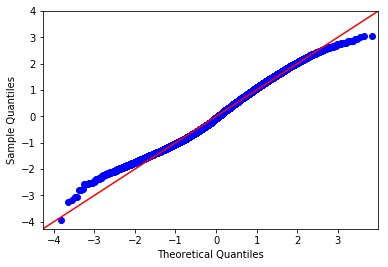

In [135]:
# Plotting the residuals to make sure that they are normally distributed
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

Analyzing the Above Q-Q plot shows that the residuals are normally distributed and we can continue with this model to the next step of training and testing data.

In [154]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

11901 3968 11901 3968


In [155]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [156]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [157]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [158]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [159]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [160]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error: ', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error:  11860813578.179802
Test Mean Squared Error:  11207181498.763897


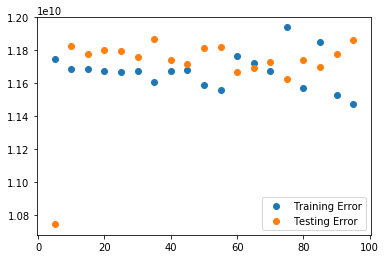

In [161]:
import random
random.seed(10)

train_err = []
test_err = []
t_sizes = list(range(5, 100, 5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label = 'Training Error')
plt.scatter(t_sizes, test_err, label = 'Testing Error')
plt.legend()

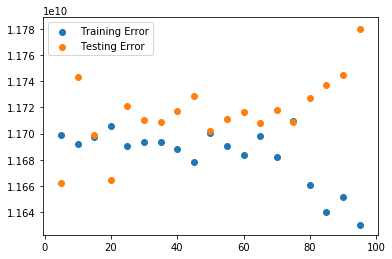

In [162]:
random.seed(9)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_10_results = np.mean(cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error'))
cv_20_results = np.mean(cross_val_score(linreg, X, y, cv=20, scoring='neg_mean_squared_error'))

print(cv_5_results)
print(cv_10_results)
print(cv_20_results)

-11711580605.93838
-11712776652.829426
-11708810839.7249


Step 5: Interpreting the Data
The features that best predict the cost of a house in King County are the square footage of the lot, the number of bedrooms, the number of floors, the square footage of the basement, as well as the square footage of the 15 nearest neighbors houses.  With an r-square value of .922 - about 92% of the the data fits this model.  
After doing the validation, with training and testing, we got a similar error rate in both which means we are not overfitting or underfitting our data.  
Looking at the model, if your neighbors expand the square footage of their living space by about 100 square feet, that positively impacts the value of your house.  Also, increasing the number of bedrooms in a house increases that value of the house - so converting an attic or a basement is advantageous to increasing your profit.  Finally, if you're looking to cut costs as a buyer, finding a house with a smaller lot will help to decrease your cost.